<a href="https://colab.research.google.com/github/Skwarson96/skull_stripping_project/blob/main/skull_stripping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade nibabel

     |████████████████████████████████| 3.3MB 29.1MB/s 
  Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


Get data


In [2]:
!wget "https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1" -O public.zip
!unzip -q public.zip
!rm public.zip

--2021-02-15 12:24:24--  https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1
Resolving putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)... 13.107.136.9
Connecting to putpoznanpl-my.sharepoint.com (putpoznanpl-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUURnRjJWUTFjc0I0UXVIUEtvajV2RHBqNkNRaTlwLUFBP3J0aW1lPW5WTHhvYXpSMkVn [following]
--2021-02-15 12:24:25--  https://putpoznanpl-my.sharepoint.com/personal/dominik_pieczynski_put_poznan_pl/Documents/Public.zip?originalPath=aHR0cHM6Ly9wdXRwb3puYW5wbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb21pbmlrX3BpZWN6eW5za2lfcHV0X3Bvem5hbl9wbC9FV0laX3htOHdYcE1qUURnR

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Create valid dirs

In [17]:
!mkdir /content/FirstDataset/valid
!mkdir /content/SecondDataset/valid

In [18]:
!mkdir /content/FirstDataset/train2

Checking the number of scans in dirs 

In [ ]:
import os
import shutil

print("FirstDataset")
filepath1 = '/content/FirstDataset/train'
filenames1 = os.listdir(filepath1)
filenames1 = sorted(filenames1)
print('train', len(filenames1))
print('test', len(os.listdir('/content/FirstDataset/test')))
print(int(len(filenames1)/5)) #114

print("SecondDataset")
filepath2 = '/content/SecondDataset/train'
filenames2 = os.listdir(filepath2)
filenames2 = sorted(filenames2)
print('train', len(filenames2))
print('test', len(os.listdir('/content/SecondDataset/test')))
print(int(len(filenames2)/5)) # 20

FirstDataset
train 574
test 72
114
SecondDataset
train 100
test 25
20


Transfer of some data from train dir to valid dir

In [9]:
import os
import shutil
from pathlib import Path

# FirstDataset
filepath1 = Path('/content/FirstDataset/train')

train_X_1 = []
train_y_1 = []

for scan_path in sorted(filepath1.iterdir()):
  if scan_path.name.endswith('mask.nii.gz'):
    train_y_1.append(scan_path)
  else:
    train_X_1.append(scan_path)

print(len(train_X_1), train_X_1)
print(len(train_y_1), train_y_1)

# SecondDataset
filepath2 = Path('/content/SecondDataset/train')

train_X_2 = []
train_y_2 = []

for scan_path in sorted(filepath2.iterdir()):
    train_y_2.append(scan_path/'mask.nii.gz')
    train_X_2.append(scan_path/'T1w.nii.gz')

print(len(train_X_2), train_X_2)
print(len(train_y_2), train_y_2)

# valid_filenames1 = filenames1[:int(len(filenames1)/5)]
# # print(valid_filenames1)
# for file_name in valid_filenames1:
#   shutil.move(f"/content/FirstDataset/train/{file_name}", f"/content/FirstDataset/valid/{file_name}")

# print("train len:", len(os.listdir('/content/FirstDataset/train')))
# print("train2 len:", len(os.listdir('/content/FirstDataset/train2')))
# print("valid len:", len(os.listdir('/content/FirstDataset/valid')))
# print('test len', len(os.listdir('/content/FirstDataset/test')))
# #print('finish firstDataset')

# filenames2 = os.listdir(filepath1)
# filenames2 = sorted(filenames2)

# train2_filenames = filenames2[:int(len(filenames2)/2)]

# for file_name in train2_filenames:
#   shutil.move(f"/content/FirstDataset/train/{file_name}", f"/content/FirstDataset/train2/{file_name}")

# print("train len:", len(os.listdir('/content/FirstDataset/train')))
# print("train2 len:", len(os.listdir('/content/FirstDataset/train2')))
# print("valid len:", len(os.listdir('/content/FirstDataset/valid')))
# print('test len', len(os.listdir('/content/FirstDataset/test')))
# #print('finish firstDataset')

# --------------------------------------------------------------------

# # SecondDataset
# filepath2 = '/content/SecondDataset/train'
# filenames2 = os.listdir(filepath2)
# filenames2 = sorted(filenames2)
# # print(len(filenames2))
# valid_filenames2 = filenames2[:int(len(filenames2)/5)]
# # print(valid_filenames2)
# for file_name in valid_filenames2:
#   shutil.move(f"/content/SecondDataset/train/{file_name}", f"/content/SecondDataset/valid/{file_name}")
# print("train len:", len(os.listdir('/content/SecondDataset/train')))
# print("valid len:", len(os.listdir('/content/SecondDataset/valid')))
# print('test len', len(os.listdir('/content/SecondDataset/test')))
# print('finish secondDataset')


287 [PosixPath('/content/FirstDataset/train/011e40c2b1d3c9bb53bd9e5a7efd04ba.nii.gz'), PosixPath('/content/FirstDataset/train/0187e4cb2fb4971848c8981e9ece0849.nii.gz'), PosixPath('/content/FirstDataset/train/022161680299e1f3bea7169947dc45b6.nii.gz'), PosixPath('/content/FirstDataset/train/02862555e24fd75a84a3259e4210e73b.nii.gz'), PosixPath('/content/FirstDataset/train/04e0e6ed0432fd737fd3f29fe551b77c.nii.gz'), PosixPath('/content/FirstDataset/train/05b438c4933b77168c529ea19486a1c9.nii.gz'), PosixPath('/content/FirstDataset/train/06503d8025b2830c50599cfcc0febd39.nii.gz'), PosixPath('/content/FirstDataset/train/0a2de3cae8ca66ea62b7e2dae3bdffca.nii.gz'), PosixPath('/content/FirstDataset/train/0b3ea09bb26b17af2b596e96875d2ca2.nii.gz'), PosixPath('/content/FirstDataset/train/0c7dc995949da4278941d36c048ff2c9.nii.gz'), PosixPath('/content/FirstDataset/train/0efee62646deb97c8c7cfa0f457fa4dc.nii.gz'), PosixPath('/content/FirstDataset/train/105625ce5c645192e3c3ca78b7b32edb.nii.gz'), PosixPath('

In [20]:
from sklearn.model_selection import train_test_split

X_train_all = train_X_1 + train_X_2
y_train_all = train_y_1 + train_y_2

X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, train_size=0.9, random_state=42)

print('X_train len:', len(X_train))
print('y_train len:', len(y_train))
print('X_valid len:', len(X_valid))
print('y_valid len:', len(y_valid))


X_train len: 348
y_train len: 348
X_valid len: 39
y_valid len: 39


In [21]:
print(X_train)
print(len(X_train))

X_train = X_train[0:10]
y_train = y_train[0:10]
X_valid = X_valid[0:10]
y_valid = y_valid[0:10]

print(X_train)
print(len(X_train))


[PosixPath('/content/SecondDataset/train/71be4353b96c7f51ab9118badc88e181/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/2fa3623f2dd0b6f244844c816f012289.nii.gz'), PosixPath('/content/FirstDataset/train/3600b0c2de04973782eee6256d453fb3.nii.gz'), PosixPath('/content/SecondDataset/train/f8a6e51b9d4b8c0d1db579aec43f4d56/T1w.nii.gz'), PosixPath('/content/SecondDataset/train/29e9cc5252f20fccdc31f5b2498c2cea/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/68b91fb712cd2c2a577a39966b9938b6.nii.gz'), PosixPath('/content/FirstDataset/train/64fc34796f18199faaf9cc60998c5bbb.nii.gz'), PosixPath('/content/SecondDataset/train/bce32491497655423e5af47a62bdcf95/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/3a14401f2de9c2eb4fe22f2228f81309.nii.gz'), PosixPath('/content/FirstDataset/train/1cdd4ddcbd83403d890b14cb499776e5.nii.gz'), PosixPath('/content/FirstDataset/train/247f4d2981ddfb18e004fa88311b2798.nii.gz'), PosixPath('/content/FirstDataset/train/cbab2172468035987821c11d29290633.nii.g

In [ ]:
for 

###Eksport to png

Template methods

In [20]:
import numpy as np
import nibabel as nib

from typing import Tuple, List
from pathlib import Path


def load_raw_volume(path: Path) -> Tuple[np.ndarray, np.ndarray]:
  data: nib.Nifti1Image = nib.load(str(path))
  data = nib.as_closest_canonical(data)
  raw_data = data.get_fdata(caching='unchanged', dtype=np.float32)
  return raw_data, data.affine


def load_labels_volume(path: Path) -> np.ndarray:
  return load_raw_volume(path)[0].astype(np.uint8)


def save_labels(data: np.ndarray, affine: np.ndarray, path: Path):
  nib.save(nib.Nifti1Image(data, affine), str(path))


def show_slices(slices: List[np.ndarray]):
   fig, axes = plt.subplots(1, len(slices))
   for i, data_slice in enumerate(slices):
       axes[i].imshow(data_slice.T, cmap="gray", origin="lower")

Create dirs for images

Mounted at /content/drive


In [1]:
print("test")

test


In [28]:
# !rm -rf FirstDataset_images

# !mkdir /content/FirstDataset_images

# !mkdir /content/FirstDataset_images/train
# !mkdir /content/FirstDataset_images/train/images
# !mkdir /content/FirstDataset_images/train/masks

# !mkdir /content/FirstDataset_images/valid
# !mkdir /content/FirstDataset_images/valid/images
# !mkdir /content/FirstDataset_images/valid/masks

!rm -rf /content/drive/MyDrive/FirstDataset_images

!mkdir /content/drive/MyDrive/FirstDataset_images

!mkdir /content/drive/MyDrive/FirstDataset_images/train
!mkdir /content/drive/MyDrive/FirstDataset_images/train/images
!mkdir /content/drive/MyDrive/FirstDataset_images/train/masks

# #!rm -rf /content/drive/MyDrive/FirstDataset_images/valid
!mkdir /content/drive/MyDrive/FirstDataset_images/valid
!mkdir /content/drive/MyDrive/FirstDataset_images/valid/images
!mkdir /content/drive/MyDrive/FirstDataset_images/valid/masks
print("done")

done


In [ ]:
!mkdir /content/drive/MyDrive/FirstDataset_images/train/images/images
!mkdir /content/drive/MyDrive/FirstDataset_images/train/masks/masks

!mkdir /content/drive/MyDrive/FirstDataset_images/valid/images/images
!mkdir /content/drive/MyDrive/FirstDataset_images/valid/masks/masks

In [ ]:
!ls /content/drive/MyDrive/FirstDataset_images/valid/images/images

Export to png

In [ ]:
!mkdir /content/drive/MyDrive/Test_images
!mkdir /content/drive/MyDrive/Test_images/test

/content/FirstDataset/train2/58f4e1954e11a28da97e9aa62e5f5deb.nii.gz
[[1 2 1 ... 0 0 0]
 [0 2 2 ... 0 0 0]
 [0 3 4 ... 1 0 0]
 ...
 [5 5 0 ... 1 1 0]
 [3 2 4 ... 1 1 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
(256, 256)


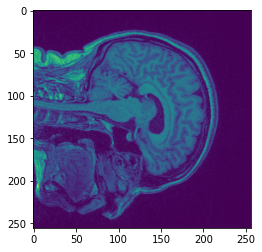

In [25]:
import matplotlib
import cv2

first_dataset_train_path = Path('/content/FirstDataset/train2')
first_dataset_image_train_path = '/content/drive/MyDrive/Test_images/test/'

for scan_path in first_dataset_train_path.iterdir():
  print(scan_path)

  if scan_path.name.endswith('mask.nii.gz'):
    pass
  else:
    raw_volume, affine = load_raw_volume(scan_path)
    volume_max = np.amax(raw_volume)
    volume_min = np.amin(raw_volume)

    for idx in range(raw_volume.shape[0]):
      path = f'{first_dataset_image_train_path}{scan_path.name}_{100}_.png'

      volume = (raw_volume[100]-volume_min)/(volume_max-volume_min)
      volume = volume*255
      volume = volume.astype('uint8')


      print(volume)
      print(type(volume))
      print(np.shape(volume))

      plt.imshow(volume, vmin=0, vmax=255)
      plt.imsave(path, volume)
      # matplotlib.image.imsave(path, volume,  vmin=0, vmax=255)
      break
    break



In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Test_images/test/58f4e1954e11a28da97e9aa62e5f5deb.nii.gz_100_.png')
print(img)
print(type(img))
print(np.shape(img))
plt.imshow(img)

In [ ]:
import numpy as np


img = plt.imread('/content/drive/MyDrive/Test_images/test/58f4e1954e11a28da97e9aa62e5f5deb.nii.gz_100_.png')

print(img)
print(np.shape(img))
plt.imshow(img)

In [ ]:
def raw_volume_to_png():
  pass

In [ ]:
import matplotlib.pyplot as plt
import cv2


first_dataset_train_path = Path('/content/FirstDataset/train2')
first_dataset_image_train_path = '/content/drive/MyDrive/FirstDataset_images/train/images/images/'
first_dataset_mask_train_path = '/content/drive/MyDrive/FirstDataset_images/train/masks/masks/'


for scan_path in first_dataset_train_path.iterdir():

  print(scan_path)
  
  if scan_path.name.endswith('mask.nii.gz'):
    mask_volume = load_labels_volume(scan_path)
    volume_max = np.amax(mask_volume)
    volume_min = np.amin(mask_volume)

    for idx in range(mask_volume.shape[0]):
      path = f'{first_dataset_mask_train_path}{scan_path.name}_{idx}_.png'

      volume = (mask_volume[idx]-volume_min)/(volume_max-volume_min)
      volume = volume*255
      volume = volume.astype('int32')
      # print(volume[0])
      plt.imsave(path, volume)

  else:

    raw_volume, affine = load_raw_volume(scan_path)
    volume_max = np.amax(raw_volume)
    volume_min = np.amin(raw_volume)

    for idx in range(raw_volume.shape[0]):
      path = f'{first_dataset_image_train_path}{scan_path.name}_{idx}_.png'

      volume = (raw_volume[idx]-volume_min)/(volume_max-volume_min)
      volume = volume*255
      volume = volume.astype('int32')

      # print(volume[0])
      # plt.imshow(volume, vmin=0, vmax=255)
      # break

      plt.imsave(path, volume)

#     # break
    

print("TRAIN DATASET FINISHED")

first_dataset_valid_path = Path('/content/FirstDataset/valid')
first_dataset_image_valid_path = '/content/drive/MyDrive/FirstDataset_images/valid/images/images/'
first_dataset_mask_valid_path = '/content/drive/MyDrive/FirstDataset_images/valid/masks/masks/'

for scan_path in first_dataset_valid_path.iterdir():
  print(scan_path)
  

  if scan_path.name.endswith('mask.nii.gz'):
    mask_volume = load_labels_volume(scan_path)

    volume_max = np.amax(mask_volume)
    volume_min = np.amin(mask_volume)

    for idx in range(mask_volume.shape[0]):
      path = f'{first_dataset_mask_valid_path}{scan_path.name}_{idx}_.png'

      volume = (mask_volume[idx]-volume_min)/(volume_max-volume_min)
      volume = volume*255
      volume = volume.astype('int32')

      plt.imsave(path, volume)

  else:
    raw_volume, affine = load_raw_volume(scan_path)
    volume_max = np.amax(raw_volume)
    volume_min = np.amin(raw_volume)

    for idx in range(raw_volume.shape[0]):
      path = f'{first_dataset_image_valid_path}{scan_path.name}_{idx}_.png'

      volume = (raw_volume[idx]-volume_min)/(volume_max-volume_min)
      volume = volume*255
      volume = volume.astype('int32')

      plt.imsave(path, volume)


print("VALID DATASET FINISHED")


In [ ]:
!ls /content/drive/MyDrive/FirstDataset_images/train/masks/masks


In [ ]:
!ls /content/drive/MyDrive/FirstDataset_images/valid/masks/masks

In [ ]:
print('test')

test


In [ ]:

# train
# !mkdir /content/drive/MyDrive/FirstDataset_images/train/images/images
# !mv /content/drive/MyDrive/FirstDataset_images/train/images/*.png /content/drive/MyDrive/FirstDataset_images/train/images/images

# !!mkdir /content/drive/MyDrive/FirstDataset_images/train/masks/masks
# !mv /content/drive/MyDrive/FirstDataset_images/train/masks/*.png /content/drive/MyDrive/FirstDataset_images/train/masks/masks

# valid
# !mkdir /content/drive/MyDrive/FirstDataset_images/valid/images/images
# !mv /content/drive/MyDrive/FirstDataset_images/valid/images/*.png /content/drive/MyDrive/FirstDataset_images/valid/images/images

# !!mkdir /content/drive/MyDrive/FirstDataset_images/valid/masks/masks
# !mv /content/drive/MyDrive/FirstDataset_images/valid/masks/*.png /content/drive/MyDrive/FirstDataset_images/valid/masks/masks



mkdir: cannot create directory ‘/content/drive/MyDrive/FirstDataset_images/train/images/images’: File exists
/bin/bash: /bin/mv: Argument list too long
/bin/bash: /bin/mv: Argument list too long


In [3]:
import tensorflow as tf
# from segmentation_models import get_preprocessing


# preprocesing_function = get_preprocessing('efficientnetb0')

augmentations = dict(horizontal_flip=True)

images_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    # preprocessing_function=preprocesing_function,
    # rescale = 1/255,
    )

mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator( )

In [4]:
import tensorflow as tf
# from segmentation_models import get_preprocessing


batch_size = 128
# preprocesing_function = get_preprocessing('efficientnetb0')


train_images_generator = images_datagen.flow_from_directory(
    '/content/drive/MyDrive/FirstDataset_images/train/images',
    target_size=(64, 64),
    batch_size=batch_size,
    seed=42,
    interpolation='bilinear',
    class_mode=None,
    # subset = 'training'
    )



train_mask_generator = mask_datagen.flow_from_directory(
    '/content/drive/MyDrive/FirstDataset_images/train/masks',
     target_size=(64, 64),
     batch_size=batch_size,
     seed=42,
     class_mode=None
    #  subset = 'training'
    )

val_images_generator = images_datagen.flow_from_directory(
    '/content/drive/MyDrive/FirstDataset_images/valid/images',
    target_size=(64, 64),
    batch_size=batch_size,
    seed=42,
    interpolation='bilinear',
    class_mode=None
    # subset = 'validation'
    )



val_mask_generator = mask_datagen.flow_from_directory(
    '/content/drive/MyDrive/FirstDataset_images/valid/masks',
     target_size=(64, 64),
     batch_size=batch_size,
     seed=42,
     class_mode=None
    #  subset = 'validation'
    )

train_combined_generator = zip(train_images_generator, train_mask_generator)
val_combined_generator = zip(val_images_generator, val_mask_generator)




Found 23338 images belonging to 1 classes.
Found 23338 images belonging to 1 classes.
Found 10669 images belonging to 1 classes.
Found 11207 images belonging to 1 classes.


In [5]:
joined_generator = zip(train_images_generator, train_mask_generator)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images,masks = next(joined_generator)
# print(np.shape(images[0]))
# print(images[0])
fig = plt.figure()
print(images[0])
fig.add_subplot(1, 2, 1)
plt.imshow(images[0].astype(int))
fig.add_subplot(1, 2, 2)
plt.imshow(masks[0].astype(int))

In [1]:
# segmentation_models nie jest domyślnie zainstalowane w Colabie
!pip install segmentation_models

In [2]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [10]:
from segmentation_models import Unet
# import segmentation_models. as smp


model = Unet('efficientnetb1', classes=1, activation='sigmoid', encoder_weights='imagenet', encoder_freeze=True)


In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=3e-4),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)


training_samples = train_images_generator.n
validation_samples = val_images_generator.n

batch_size = 16
validaton_batch_size = 32

model.fit(
    train_combined_generator, 
    steps_per_epoch=training_samples // batch_size,
    # batch_size=16,
    # validation_data = val_combined_generator,
    # validation_steps = validation_samples // validaton_batch_size,
    epochs=20,
    use_multiprocessing=True,
    verbose=1
)

Epoch 1/20
  39/1458 [..............................] - ETA: 27:22:32 - loss: -89.7921 - binary_accuracy: 0.1919

Process Keras_worker_ForkPoolWorker-1:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/utils/data_utils.py", line 831, in next_sample
    return six.next(_SHARED_SEQUENCES[uid])
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py", line 104, in __next__
    return self.next(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py", line 116, in next
    return self._get_batches_of_transformed_samples(index_array)
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py", line 230, in _get_batches_of_tran